### INSTRUCTIONS - Assignment 3

- Submit only the ipynb file with file format main_{UBID}.ipynb (e.g. main_50370999.ipynb), Submission other than this format will get zero.
- Don't submit the zip folder.
- We will run all the cells from start to finish, if we get any error or cell executing for more than 20 sec. will get zero for that problem. So plesae make sure to double check your ipynb file from start to finish before submitting.
- Refrain from using the Sklearn library unless explicitly mentioned.
- Do not use numpy's cov, corrcoef, svd built-in functions.
- Don't import additional libraries in the file.

# Dataset information

There are a total of 4 datasets for the assignment.

For Assignment3, please choose the dataset according to the following rule.

Student UBID + 1 modulo 4 = (number between 0 and 3). For example: (50370006 + 1) % 4 = 3

### 0 - UCI dermatology dataset (Target_variable: classcode)

Link: https://archive.ics.uci.edu/ml/datasets/Dermatology

Features to use -> {erythema, scaling, definite borders, itching}

### 1 - MAGIC Gamma Telescope Data Set (Target_variable: class: g,h # gamma (signal), hadron (background))

Link: https://archive.ics.uci.edu/ml/datasets/magic%2Bgamma%2Btelescope

Features to use -> {fLength, fWidth, fSize, fConc}

### 2 - Automobile dataset (Target_variable: body-type)

Link: https://archive.ics.uci.edu/ml/datasets/Automobile

Features to use -> {length, width, height, horsepower}

### 3 - Glass dataset (Target_variable: glass_type)

Link: https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data

Features to use -> {refractive_index, sodium, aluminium, silicon}

Perform all the tasks in the assignment only for one single dataset.

# Feature information

For this assignment, students must start with the 4 features for their respective datasets, use PCA and LDA to get the 2 most significant features as they continue to solve the assignment.

In [243]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

Step 1: load the dataset

In [244]:
# loads csv file into pandas dataframe
df = pd.read_csv('/data/workspace_files/dermatology.csv')

# Step 2 - 8: PCA implementation 


# Step 2: Normalize the feature columns

Hint: you can use the imported StandardScaler

In [245]:
scaler = StandardScaler()
df1 = df[['erythema', 'scaling', 'definite borders', 'itching']]
new_df = df['melanin incontinence'].values
scale = scaler.fit_transform(df1)
print(scale)

[[-0.1028946   0.29250271 -1.70937509  1.4373339 ]
 [ 1.40348234  1.71991595  1.60084334  0.55762787]
 [-0.1028946  -1.13491053  0.49743719  1.4373339 ]
 ...
 [ 1.40348234  0.29250271  0.49743719  0.55762787]
 [-0.1028946  -1.13491053  1.60084334 -0.32207816]
 [ 1.40348234  0.29250271  0.49743719 -1.2017842 ]]


# Eigen decomposition : Compute the eigen values and eigen vectors

Step 3: 
Calculate the covariance between the feature columns. This should be a d x d matrix, where d is the number of features. 
$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$

In matrix notation:   
$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$  
where $\mathbf{\bar{x}}$ is the mean vector

In [246]:
data = np.array(df[['erythema', 'scaling', 'definite borders', 'itching']])
N = data.shape[0]
n_dim = data.shape[1]
cov_df = np.zeros((n_dim, n_dim))

avg = []
for i in range(n_dim):
    avg.append(sum([d[i] for d in data]) / N)

for i in range(n_dim):
    for j in range(n_dim):
        var = 0
        for d in data:
            var += (d[i] - avg[i]) * (d[j] - avg[j])
        var /= (N - 1)
        cov_df[i, j] = var
print(cov_df)

[[ 0.44189685  0.20307658  0.15690546 -0.03603563]
 [ 0.20307658  0.49214013  0.22791377 -0.06723557]
 [ 0.15690546  0.22791377  0.82360207 -0.06463059]
 [-0.03603563 -0.06723557 -0.06463059  1.29572573]]


# Step 4 : Find the eigen values and eigen vectors that represent the feature space.

The eigenvectors (principal components) will be used to determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues will explain the variance of the data along the feature axes.



In [247]:
eigen_values, eigen_vectors = np.linalg.eig(cov_df)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.7050087   0.60292755  0.35393479 -0.11904313]
 [ 0.70374156  0.53040471  0.44128176 -0.16937845]
 [-0.08638516 -0.59551031  0.76329226 -0.23513826]
 [ 0.01575278  0.02273056  0.3120665   0.94965766]] 

Eigenvalues: 
 [0.25921618 0.46421271 1.00169826 1.32823763] 



# Step 5 : Consider k=2, Find k axes in the old feature space that contribute most to the variance of the data.

where k is the number of principal components, i.e the number of axes in the new feature space.

Hint: k largest eigen values and their corressponding eigen vectors

In [248]:
variances = []
for i in eigen_values[:2]:
     variances.append((i / sum(eigen_values)) * 100)
print(variances)

[8.489525311970503, 15.203316405484191]


# Step 6: Compute the projection matrix

The projection matrix will be of dimension d x k. This matrix will be used in the next step to project the data points in the old feature space to the newly calculated feature space.

Note: The dimension of old feature space is d, whereas the new feature space is k.

Hint: stack the eigen values obtained in the previous step accordingly

In [249]:
projection_matrix = (eigen_vectors.T[:][:2]).T
print(projection_matrix)

[[-0.7050087   0.60292755]
 [ 0.70374156  0.53040471]
 [-0.08638516 -0.59551031]
 [ 0.01575278  0.02273056]]


# Step 7: Project the data points onto the new feature space

The output of this step should be a matrix with dimension, no.of.samples x k

Hint: Use the original data points and the projection matrix computed in step 6 to get the new points.

In [250]:
pca = scale.dot(projection_matrix)
print(pca)

[[ 0.44869456  1.14372873]
 [ 0.09140417  0.81780618]
 [-0.74647131 -0.92755745]
 [ 0.21648527 -0.23043938]
 [ 1.24873093  0.56665975]
 [ 1.22101529  0.52666733]
 [-0.56969329  0.3666258 ]
 [ 0.1627408  -0.82754048]
 [ 0.31180319  0.42665035]
 [ 0.31180319  0.42665035]
 [ 0.17286427  1.4548997 ]
 [ 0.44869456  1.14372873]
 [ 0.28204     2.13198565]
 [ 1.12569737 -0.13042241]
 [ 0.1627408  -0.82754048]
 [ 0.47845774 -0.56160656]
 [ 0.35337664  0.48663899]
 [ 0.06368853  0.77781375]
 [-0.84178923 -1.58464719]
 [ 0.50617337 -0.52161414]
 [-0.66501121 -0.29046393]
 [-0.84552358  0.67779678]
 [ 0.43483674  1.12373251]
 [ 0.25805872 -0.17045074]
 [-1.5603655  -0.37048469]
 [-0.69272684 -0.33045636]
 [ 0.47845774 -0.56160656]
 [ 1.32006756 -1.0786869 ]
 [-0.81780794  0.7177892 ]
 [ 0.31553754 -1.83579361]
 [-0.72249002  1.37487894]
 [-0.6271721   2.03196867]
 [ 1.16727083 -0.07043377]
 [ 0.31180319  0.42665035]
 [-0.59740892  0.32663338]
 [ 0.33951882  0.46664278]
 [-0.74647131 -0.92755745]
 

# Step 8: Plot the new data points as a scatter plot

Visualize the new data points on a plot. You can use the imported package matplotlib for this purpose

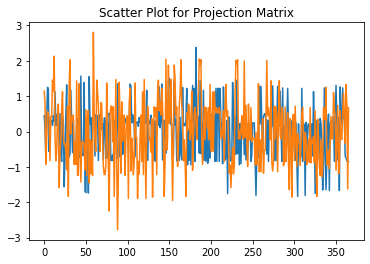

In [251]:
plt.title("Scatter Plot for Projection Matrix")
plt.plot(pca)

# Step 9 - 14 Linear Discriminant Analysis

# Step 9 - Prepare the dataset

In [252]:
# Import the dataset again from step 1.
"""
Make sure that the data is normalized and all the null values are removed.
"""
# Insert code below this line
df = pd.read_csv('/data/workspace_files/dermatology.csv')
df.head()

,Unnamed: 0,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
0,0,2,2,0,3,0,0,0,0,1,...,0,0,3,0,0,0,1,0,55,2
1,1,3,3,3,2,1,0,0,0,1,...,0,0,0,0,0,0,1,0,8,1
2,2,2,1,2,3,1,3,0,3,0,...,0,2,3,2,0,0,2,3,26,3
3,3,2,2,2,0,0,0,0,0,3,...,3,0,0,0,0,0,3,0,40,1
4,4,2,3,2,2,2,2,0,2,0,...,2,3,2,3,0,0,2,3,45,3


# Step 10 - Computing d-dimensional mean vectors

In this first step, we will start off with a simple computation of the mean vectors $\pmb m_i$, $(i = 1,2,3,..)$ of the different classes:
    
$\pmb m_i = \begin{bmatrix} 
\mu_{\omega_i (\text{feature 1})}\\ 
\mu_{\omega_i (\text{feature 2})}\\ 
\mu_{\omega_i (\text{feature 3)}}\\
\mu_{\omega_i (\text{feature 4})}\\
\end{bmatrix} \; , \quad \text{with} \quad i = 1,2,3,...$

In [253]:
mean_vectors = []
for cl in range(0,4):
    mean_vectors.append(np.mean(df1[new_df==cl], axis=0))
print(mean_vectors)

[erythema            2.064189
scaling             1.831081
definite borders    1.415541
itching             1.155405
dtype: float64, erythema            1.625
scaling             1.250
definite borders    1.750
itching             2.375
dtype: float64, erythema            2.108696
scaling             1.652174
definite borders    2.108696
itching             2.260870
dtype: float64, erythema            2.2500
scaling             1.8125
definite borders    2.3125
itching             2.1875
dtype: float64]


# Step 11 - Computing the Scatter Matrices

## 11.1 Within-class scatter matrix $S_W$

The **within-class scatter** matrix $S_W$ is computed by the following equation:  

$S_W = \sum\limits_{i=1}^{c}  S_i$

where  
$S_i = \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T$  
(scatter matrix for every class) 

and $\pmb m_i$ is the mean vector    
$\pmb m_i = \frac{1}{n_i} \sum\limits_{\pmb x \in D_i}^n \; \pmb x_k$

In [254]:
'''classes = ["erythema", "scaling", "definite borders", "itching"]
within_class_scatter_matrix = np.zeros((36,36))

for c, rows in df.groupby(by=classes):
    s = np.zeros((36,36))
    for index, row in rows.iterrows():
        #x, mc = row.values.reshape(36,1), mean_vectors[c].values.reshape(36,1)
        x, mc = np.array(row.values.reshape(36, 1)), np.array(mean_vectors[c].reshape(36, 1))
        s += (x - mc).dot((x - mc).T)
    
    within_class_scatter_matrix += s'''

'''S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4, 4))                  # scatter matrix for every class
    for row in df[new_df == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)'''
S_W = np.zeros((4, 4))
for label, mv in zip(range(0, 4), mean_vectors):
    class_scatter = np.cov(df1[new_df==label].transpose)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

TypeError: TypeError: unsupported operand type(s) for /: 'method' and 'int'

## 11.2 Between-class matrix $S_B$

The **between-class scatter** matrix $S_B$ is computed by the following equation:  

$S_B =  \sum\limits_{i=1}^{c} N_{i} (\pmb m_i - \pmb m) (\pmb m_i - \pmb m)^T$

where  
 $\pmb m$ is the overall mean, and $\pmb m_{i}$ and $N_{i}$ are the sample mean and sizes of the respective classes.

# Step 12: Solving the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$

Next, we will solve the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$ to obtain the linear discriminants.

### Checking the eigenvector-eigenvalue calculation

A quick check that the eigenvector-eigenvalue calculation is correct and satisfy the equation:

$\pmb A\pmb{v} =  \lambda\pmb{v}$  

<br>
where  
$\pmb A = S_{W}^{-1}S_B\\
\pmb{v} = \; \text{Eigenvector}\\
\lambda = \; \text{Eigenvalue}$

In [26]:
for i in range(len(eigen_values)):
    eigv = eigen_vectors[:,i].reshape(4,1) 
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv), 
                                         eigen_values[i] * eigv, 
                                         decimal=6, err_msg='', verbose=True)

# This cell must run without errors

NameError: NameError: name 'S_W' is not defined

## Step 13: Selecting linear discriminants for the new feature subspace

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.  
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$ eigenvectors.

In [ ]:
# Eigenvalues in decreasing order:

# 13.1. Choosing *k* eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our $d \times k$-dimensional eigenvector matrix $\pmb W$ (here $4 \times 2$: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [ ]:
# Tip: use np.hstack

# Step 14: Transforming the samples onto the new subspace

In the last step, we use the $4 \times 2$-dimensional matrix $\pmb W$ that we just computed to transform our samples onto the new subspace via the equation   

$\pmb Y = \pmb X \times \pmb W $.

(where $\pmb X$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\pmb Y$ are the transformed $n \times k$-dimensional samples in the new subspace).

# A comparison of PCA and LDA

In [ ]:
# Sample code for the penguins and Iris dataset visualization.
# Do not change the code here.
# Code written in this cell is not graded but is used to grade the output of code from previous cells.

from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)
    
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
    
    plt.tight_layout
    plt.grid()
    
    plt.show()

In [ ]:
plot_pca()
plot_step_lda()

In [ ]:
# Created by Naresh Kumar Devulapally and Sriram Rangarajan